In [1]:
import pickle

import numpy as np
from tqdm import tqdm

In [2]:
import warnings
warnings.simplefilter("ignore", UserWarning)
warnings.simplefilter("ignore", RuntimeWarning)

In [3]:
with open(f'ptv_result_test.pickle', mode='rb') as fp:
    ptv_result = pickle.load(fp)

In [4]:
data = [[[]*50]*50]*50

In [5]:
for p in tqdm(range(ptv_result.shape[0])):
    for j in range(0, 50):
        for i in range(0, 50):
            if np.sqrt((1350 // 50 * i - ptv_result.iloc[p, 0])**2 + (1300 // 50 * j - ptv_result.iloc[p, 1])**2) < 75:
                data[j][i].append(
                    [
                        ptv_result.iloc[p, 0],
                        ptv_result.iloc[p, 1],
                        ptv_result.iloc[p, 2],
                        ptv_result.iloc[p, 3]
                    ]
                )
                break
        else:
            continue
        break

100%|██████████| 36891/36891 [36:10<00:00, 16.99it/s] 


In [9]:
with open(f'ptv_result2_test.pickle', mode='wb') as fp:
    pickle.dump(data, fp)

In [10]:
x = np.linspace(0, 1350, 50)
y = np.linspace(0, 1300, 50)
xx, yy = np.meshgrid(x, y)

u = np.zeros([50, 50])
v = np.zeros([50, 50])

In [11]:
for j in tqdm(range(50)):
    for i in range(50):
        tmp = data[j][i]
        top_u, top_v = 0, 0
        bottom = 0

        sigma = 1.24 * np.sqrt(75*75*np.pi / 36891)

        for k in range(len(tmp)):
            r = np.sqrt((1350 // 50 * i - tmp[k][0])**2 + (1300 // 50 * j - tmp[k][1])**2)
            omega = np.exp(- (r / sigma)**2)

            top_u += omega * tmp[k][2]
            top_v += omega * tmp[k][3]
            bottom += omega

        u[j, i] = top_u / bottom
        v[j, i] = top_v / bottom

100%|██████████| 50/50 [05:51<00:00,  7.04s/it]


In [13]:
from matplotlib import pyplot as plt

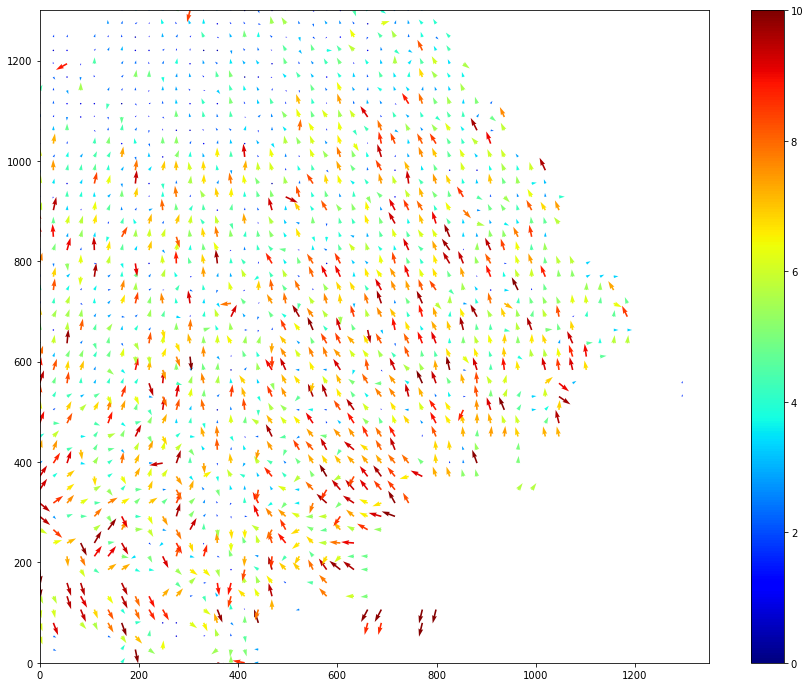

In [14]:
fig, ax = plt.subplots(figsize=(15, 12))
plt.xlim(0, 1350)
plt.ylim(0, 1300)

plt.quiver(xx, yy, u, v, np.sqrt(u**2 + v**2), cmap="jet")

plt.colorbar()
plt.clim(0, 10)
plt.show()